# Exercise 2 (A)

(A) Write a Python script to run the EditDistanceM (Matrix) for all pairs (d1, d2) of DNAs, where d1 is a line in file ex2-dnalist1.txt (see below) and d2 a line in file ex2-dnalist2.txt (see below), and print the Top-10 most similar pairs (descending order).
* Based on the result of EditDistanceM, you should calculate similarity scores 
that should be normalised to range from 0% to 100% (100% means that the two strings are identical, 0% means that the two strings have nothing in common).
* Output example (10 lines): 1, 5, 100% 2, 3, 76.5% 3, 8, 34.6% .... where e.g., 2, 3, 76.5% means that the similarity score between the string in line 2, file ex2-dnalist1, and the string in line 3, file ex2-dnalist2, is 76.5%. Hint: use the python sort() function.

In [ ]:
import numpy as np

**max_distance** is the maximum possible distance between two strings.
It is dynamically set while parsing the dataset and used to normalize the *edit_distance_m* results.

In [ ]:
max_distance = 0

**edit_distance_m(s, t)**

A dynamic version of the edit distance function.

*:param s:* the first string

*:param t:* the target string

*:return:* The minimum edit distance between two strings.


In [ ]:
def edit_distance_m(s, t):
    size_x = len(s) + 1
    size_y = len(t) + 1

    matrix = np.zeros((size_x, size_y))

    for x in range(size_x):
        matrix[x, 0] = x

    for y in range(size_y):
        matrix[0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            matrix[x, y] = min(
                matrix[x - 1, y] + 1,
                matrix[x - 1, y - 1] if s[x - 1] == t[y - 1] else matrix[x - 1, y - 1] + 1,
                matrix[x, y - 1] + 1
            )
    return matrix[size_x - 1, size_y - 1]

**normalize_and_convert_distance_to_similarity(distances)**

It takes a dictionary of distances and returns a dictionary of similarities.

In order to normalize any given distance `d` we the following formula:

`normalized_d = (d – min(distance)) / (max(distance) – min(distance)) * 100`

For the current use case distance `0` means that the strings are identical, 
so the `min(distance)` will always be `0`.

Converting a normalized distance to a normalized similarity is calculated by subtracting the distance itself from `100`, since distance and similarity are inversely related.

*:param distances:* a dictionary of distances

*:return:* A dictionary with the keys being a tuple of line numbers and the 
values being the distance between the two DNAs.

In [ ]:
def normalize_and_convert_distance_to_similarity(distances):
    return {k: 100 - (float(v) / max_distance) * 100 for k, v in distances.items()}

**calculate_similarity(dna_list_1, dna_list_2)**

It calculates the edit distance between every pair of DNA sequences in the two lists, and returns the 10 smallest distances.

*:param dna_list_1:* the list of DNA sequences from the first file

*:param dna_list_2:* the list of DNA sequences from the second file

*:return:* A dictionary of the 10 most similar pairs of DNA sequences.

In [ ]:
def calculate_similarity(dna_list_1, dna_list_2):
    global max_distance

    line_1 = 1
    distances = {}
    for dna_1 in dna_list_1:
        line_2 = 1
        for dna_2 in dna_list_2:
            distances[(line_1, line_2)] = edit_distance_m(dna_1, dna_2)
            line_2 += 1
            max_distance = max(max_distance, len(dna_1), len(dna_2))
        line_1 += 1
    distances = dict(sorted(distances.items(), key=lambda item: item[1]))
    return normalize_and_convert_distance_to_similarity({k: distances[k] for k in list(distances)[:10]})

Open the two files and read the DNA sequences from them.

In [ ]:
with open('ex2-dnalist1.txt') as file:
    list_1 = [line.rstrip() for line in file]
with open('ex2-dnalist2.txt') as file:
    list_2 = [line.rstrip() for line in file]

 Calculate and print the 10 most similar pairs of DNA sequences.

In [ ]:
similarities = calculate_similarity(list_1, list_2)
print("Similarities:")
print({k: str(similarities[k]) + "%" for k in similarities})

Similarities:
{(55, 76): '62.0%', (29, 5): '60.0%', (92, 53): '60.0%', (11, 83): '58.0%', (13, 6): '58.0%', (85, 83): '58.0%', (5, 100): '56.0%', (11, 66): '56.0%', (16, 27): '56.0%', (20, 48): '56.0%'}


# Exercise 2 (B)

(B) Write a Python script to perform the following tasks:

* Generate 3 random base strings of length 2, 3 random base strings of length 3, 3 random base strings of length 4, ... etc, till length N, and write them to file file1.txt. N should be your choice, depending on your laptop/RAM setup. If you use large N, say 100, you may experience serious delays with the execution of EditDistance (Recursive). We suggest N=10 to start with and adjust appropriately, if needed.
* Repeat previous step, and write the base strings to file file2.txt (use same N as before). 
* Measure the execution time of EditDistanceM (Matrix) and EditDistance (Recursive) for string pairs: one string from file1.txt and one from file2.txt as follows: 1st line of file1.txt with 1st line of file2.txt, 2nd line of file1.txt with 2nd line of file2.txt, 3rd line of file1.txt with 3rd line of file2.txt etc...
* Calculate average (AVG) execution time for strings of same length.
* Plot a graph to show the performance: AVG execution time (Y-axis) vs line length (X-axis). Check here for a nice plot tutorial: https://matplotlib.org/tutorials/introductory/pyplot.html.

Upgrading matplotlib to the latest version.

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
import timeit

from matplotlib import pyplot as plt

**chars ** is the list of the characters that can be used to generate a random string.

In [ ]:
chars = ['A', 'T', 'G', 'C']

Creating two file names.

In [ ]:
filename1 = "file1.txt"
filename2 = "file2.txt"

**n** is the maximum number characters in a line.

In [ ]:
n = 11

**edit_distance(s, t)**

A recursive version of the edit distance function.

*:param s:* the first string

*:param t:* the target string

*:return:* The minimum edit distance between two strings.

In [ ]:
def edit_distance(s, t):
    if len(s) == 0:
        return len(t)
    elif len(t) == 0:
        return len(s)
    elif s[-1] == t[-1]:
        cost = 0
    else:
        cost = 1

    return min([edit_distance(s, t[:-1]) + 1,
                edit_distance(s[:-1], t) + 1,
                edit_distance(s[:-1], t[:-1]) + cost]
               )

**generate_random_string(string_length)**

It generates a random string of a specified length, and returns it.

*:param string_length:* The length of the random string to be generated
*:return:* A string of random characters.

In [ ]:
def generate_random_string(string_length):

    random_line = ''
    for c in range(string_length):
        random_index = random.randint(0, len(chars) - 1)
        random_letter = chars[random_index]
        random_line += random_letter
    random_line += '\n'
    return random_line

**generate_3_random_strings(string_length)**

It generates 3 random strings of a given length

*:param string_length:* The length of the strings to be generated

*:return:* A string of 3 random strings of length string_length

In [ ]:
def generate_3_random_strings(string_length):

    random_lines = ''
    for i in range(0, 3):
        random_lines += generate_random_string(string_length)
    return random_lines

**create_random_strings_file(filename)**

It creates a file called `filename` and writes to it the concatenation of the strings generated by
`generate_3_random_strings` for all values of `i` from 2 to `n`.

*:param filename:* the name of the file to be created

In [ ]:
def create_random_strings_file(filename):

    g = open(filename, 'w')
    for i in range(2, n + 1):
        g.write(generate_3_random_strings(i))
    g.close()

**time_edit_distance(dna_lines_1, dna_lines_2)**

It takes two lists of DNA sequences, and returns two dictionaries,
where the keys are the lengths of the DNA sequences, and the values are lists of the times it took to run the
edit_distance_m and edit_distance functions on the DNA sequences of that length.

*:param dna_lines_1:* a list of strings, each string is a DNA sequence

*:param dna_lines_2:* the list of DNA sequences to compare against

*:return:* A dictionary with the timing results for the recursive and m functions.

In [ ]:
def time_edit_distance(dna_lines_1, dna_lines_2):

    timing_results_m = {}
    timing_results_r = {}
    list_current_result_m = []
    list_current_result_r = []
    current_word_length = 2
    current_run = 0
    for dna_line_1, dna_line_2 in zip(dna_lines_1, dna_lines_2):
        start_m = timeit.default_timer()
        edit_distance_m(dna_line_1, dna_line_2)
        end_m = timeit.default_timer()
        list_current_result_m.append(end_m - start_m)

        start_r = timeit.default_timer()
        edit_distance(dna_line_1, dna_line_2)
        end_r = timeit.default_timer()
        list_current_result_r.append(end_r - start_r)

        current_run += 1

        if current_run == 3:
            timing_results_r[current_word_length] = list(list_current_result_r)
            timing_results_m[current_word_length] = list(list_current_result_m)
            current_run = 0
            current_word_length += 1
            list_current_result_r = []
            list_current_result_m = []

    return timing_results_m, timing_results_r

**calculate_avg_time(timing_results)**

It takes a dictionary of lists of timing results and returns a dictionary of the average timing results

*:param timing_results:* a dictionary of lists of timing results

*:return:* A dictionary with the average time.

In [ ]:
def calculate_avg_time(timing_results):

    avg = {}
    for k, v in timing_results.items():
        timing_sum = 0
        for i in range(len(v)):
            timing_sum += v[i]
        avg[k] = round(timing_sum / len(v), 4)
    return avg

**draw_plots(timing_results_r, timing_results_m)**

It takes two dictionaries, one for each algorithm, and plots the results

*:param timing_results_r:* a dictionary of the average times for the recursive edit distance function

*:param timing_results_m:* a dictionary of the average times for the edit-distance-m function

In [ ]:
def draw_plots(timing_results_r, timing_results_m):

    labels = timing_results_r.keys()

    m_avg = timing_results_m.values()
    r_avg = timing_results_r.values()

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(16, 9), dpi=(1920 / 16))
    rects1 = ax.bar(x - width / 2, m_avg, width, label='edit-distance-m')
    rects2 = ax.bar(x + width / 2, r_avg, width, label='edit-distance recursive')

    ax.set_ylabel('Time')
    ax.set_title('Edit distance m & recursive times (depending on length)')
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    plt.show()

Create two files with random DNA strings.

In [ ]:
create_random_strings_file(filename1)
create_random_strings_file(filename2)

Open the two files and read the DNA sequences from them.

In [ ]:
with open(filename1) as file:
    list_1 = [line.rstrip() for line in file]
with open(filename2) as file:
    list_2 = [line.rstrip() for line in file]

Calculate the timing results for each algorithm.

In [ ]:
timing_results_m, timing_results_r = time_edit_distance(list_1, list_2)

Find the timing averages for each algorithm.

In [ ]:
results_m_avg = calculate_avg_time(timing_results_m)
results_r_avg = calculate_avg_time(timing_results_r)
print("Average edit-distance recursive results")
print(results_r_avg)
print("Average edit-distance-m results")
print(results_m_avg)

Average edit-distance recursive results
{2: 0.0, 3: 0.0001, 4: 0.0004, 5: 0.0012, 6: 0.0089, 7: 0.0348, 8: 0.2045, 9: 1.1751, 10: 6.9212, 11: 32.8066}
Average edit-distance-m results
{2: 0.0, 3: 0.0, 4: 0.0001, 5: 0.0001, 6: 0.0001, 7: 0.0001, 8: 0.0001, 9: 0.0002, 10: 0.0002, 11: 0.0003}


Draw the timing plot.

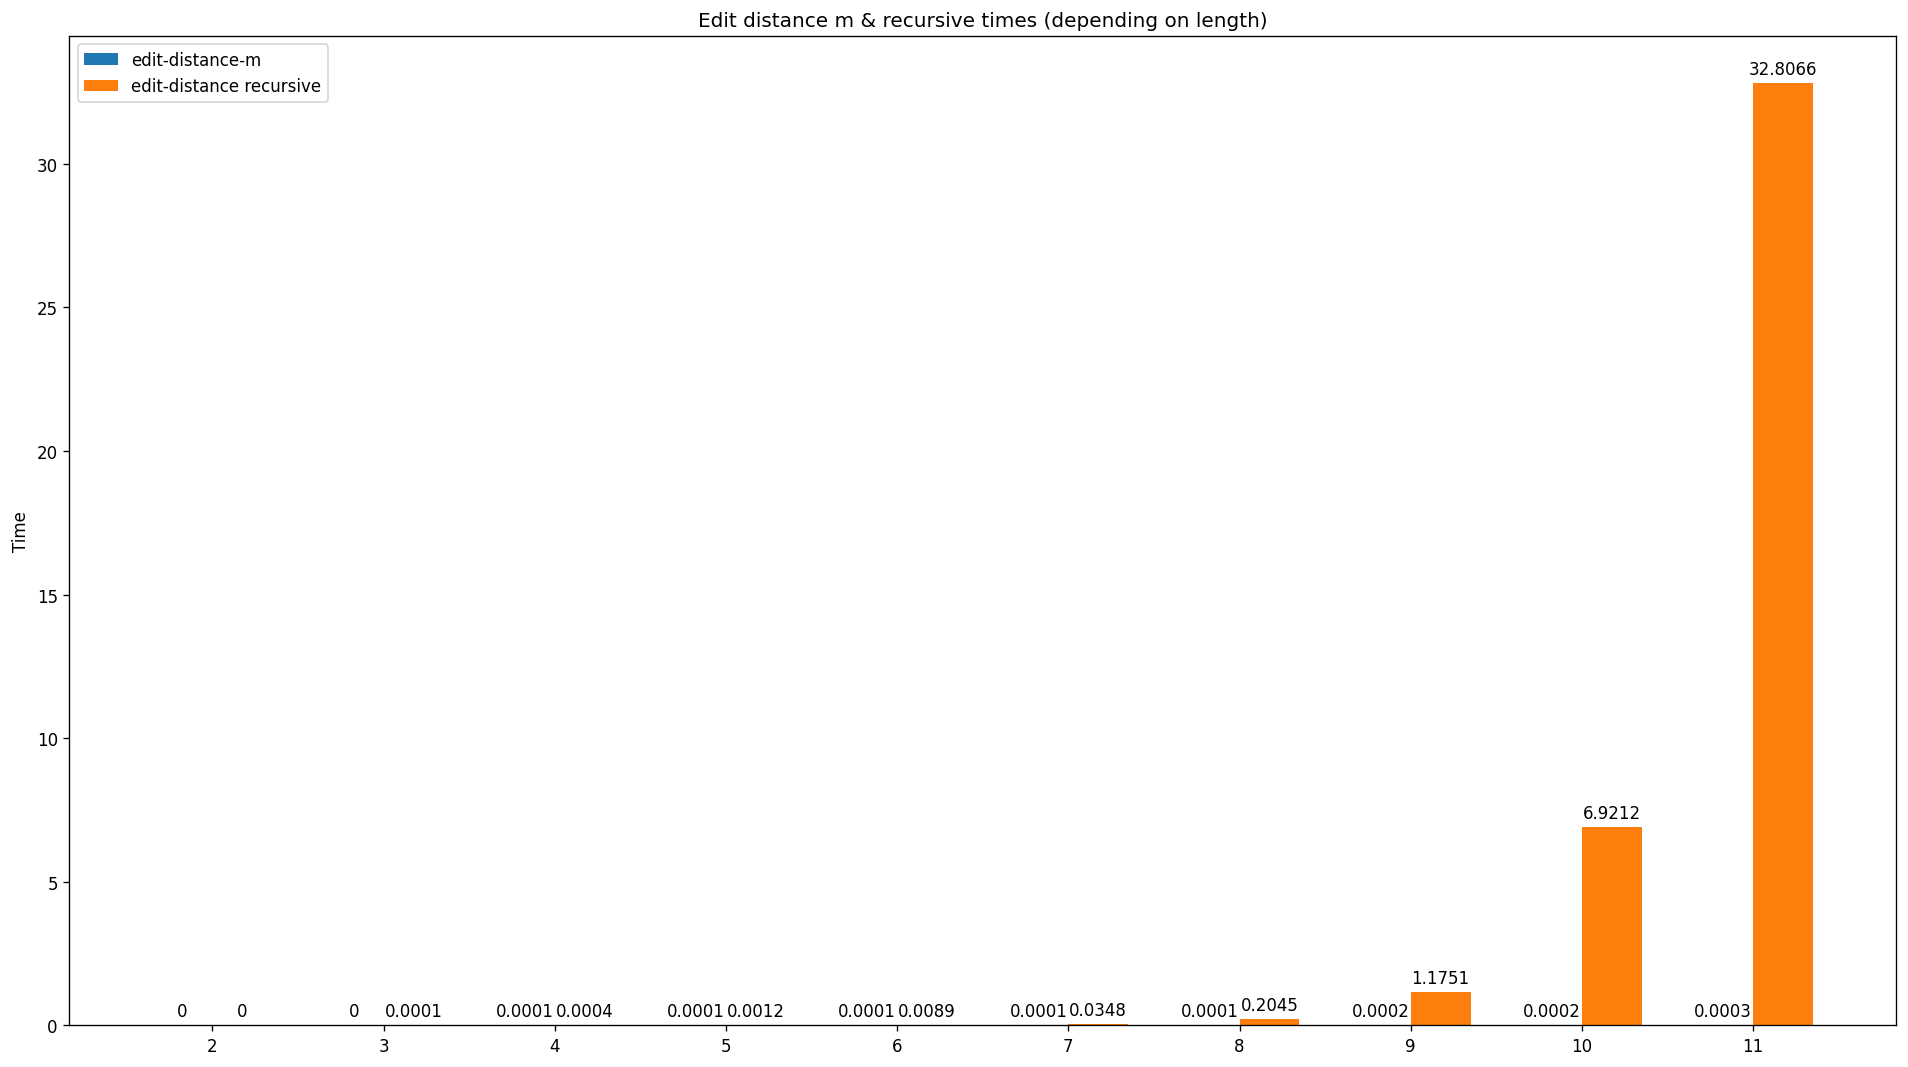

In [ ]:
draw_plots(results_r_avg, results_m_avg)